<a href="https://colab.research.google.com/github/dishankkalra23/Adult-Salary-Prediction/blob/main/Adult_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**ADULT CENSUS INCOME**</center>

<center>To predict whether a person makes over $ 50K a year based on census data</center>

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_recall_fscore_support

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Downloading Dataset

In [ ]:
!wget -q http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget -q http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

# Loading dataset

In [ ]:
df = pd.read_csv('/content/adult.data')
df.sample(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
30875,53,Private,153486,HS-grad,9,Separated,Transport-moving,Not-in-family,White,Male,0,0,30,United-States,<=50K
1011,50,Private,767403,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,40,United-States,>50K
22870,40,Local-gov,101795,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,42,United-States,<=50K
16697,38,State-gov,143517,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
8905,46,Self-emp-not-inc,182541,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,1672,50,United-States,<=50K


1.   By analyzing the sample rows from the dataframe, we have to provide the column names.
2.  Using snake case where column names are in lowercase separated with an underscore. In this way, we can access the column using a period like this df.column_name.



In [ ]:
df.columns = ['age', 'workclass', 'final_wt', 'education', 'yrs_of_education', 
              'marital_status', 'occupation', 'relationship_status', 'race', 'sex', 
              'capital_gain', 'capital_loss', 'working_hrs_per_week', 'native_country', 'label']
df.sample(5)

,age,workclass,final_wt,education,yrs_of_education,marital_status,occupation,relationship_status,race,sex,capital_gain,capital_loss,working_hrs_per_week,native_country,label
19993,33,Private,143851,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
187,31,Private,99928,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,<=50K
10799,21,State-gov,39236,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,50,United-States,<=50K
13344,33,Private,117779,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,46,United-States,>50K
10970,58,Private,373344,1st-4th,2,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K


# Understanding Data

## Summary of attributes

A concise summary of a DataFrame including the index datatype and columns, non-null values and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   32560 non-null  int64 
 1   workclass             32560 non-null  object
 2   final_wt              32560 non-null  int64 
 3   education             32560 non-null  object
 4   yrs_of_education      32560 non-null  int64 
 5   marital_status        32560 non-null  object
 6   occupation            32560 non-null  object
 7   relationship_status   32560 non-null  object
 8   race                  32560 non-null  object
 9   sex                   32560 non-null  object
 10  capital_gain          32560 non-null  int64 
 11  capital_loss          32560 non-null  int64 
 12  working_hrs_per_week  32560 non-null  int64 
 13  native_country        32560 non-null  object
 14  label                 32560 non-null  object
dtypes: int64(6), object(9)
memory usage:



1.   Total number of columns in the dataset is 15
2.   Total number of records in the dataset is 32560
3.   Explanation of each column - 

  *   **Age**: Age of an individual
  *   **workclass**: Employability status of an individual. If they are employed then whether they are private or government employees
  *   **final_wt**: Final Weight is the number of people the census believes the entry represents
  *   **education**: Highest educational qualification of an individual
  *   **yrs_of_education**: Total number of years of education received by an individual
  *   **marital_status**: Marital status of an individual
  *   **occupation**: Occupation of an individual
  *   **relationship_status**: The relationship status of an individual, whether they are married, unmarried, divorced, etc.
  *   **race**: An individual belongs to which ancestry like Asian, White, Black etc.
  *   **sex**: Gender of an individual
  *   **capital_gain**: Gain in wealth of an individual
  *   **capital_loss**: Loss in wealth of an individual
  *   **working_hrs_per_week**: Number of working hours spent weekly  by an individual 
  *   **native_country**: Country from which an individual belongs to or was born in
  *   **label**: Whether an individual earns more than 50K or not. It has these two classes: (<=50 K) and (> 50K)
4. According to above summary there is no null values but we have to further assess if there are no null values in the dataset













## Assessing data
In this module we will assess the quality of dataset and will try to identify problems in the dataset

In [ ]:
for col in df.columns:
  print(f'\033[1m{col}\033[0m: {df[col].unique()}')
  print(f'Unique values in \033[1m{col}\033[0m: {df[col].nunique()}\n')

age: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Unique values in age: 73

workclass: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in workclass: 9

final_wt: [ 83311 215646 234721 ...  34066  84661 257302]
Unique values in final_wt: 21647

education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values in education: 16

yrs_of_education: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values in yrs_of_education: 16

marital_status: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique 

1. **Working class** has '**?**' in values which according to data description on UCI means **unknown/missing values**. Effectively there are **8** unique values in working class
2.  **Final weight** has **21647** unique values and we have to check the significance of these values and final weight column in terms of predicting the class label
3. In **Marital Status**, '**Married-civ-spouse**' corresponds to a civilian spouse and '**Married-AF-spouse**' is a spouse in the Armed Forces.
4. **Occupation** has '**?**' in values so there are effectively **14** unique values
5. **Native country** column has '**?**' in values. Values like '**South**' and '**Hong**' has to be further investigated. The value '**South**' is not understandable and  the value '**Hong**' may represent **Hong Kong**




**Important Note**: There are white space characters in front of columns like workclass, occupation, race, sex, native_country, relationship_status etc.


In [ ]:
print('Number of duplicate rows in the data: ', df.duplicated().sum())

Number of duplicate rows in the data:  24


# Cleaning Data

In [ ]:
# Removing duplicate records
print('Number of rows before removing duplicate records: ',df.shape[0])
df.drop_duplicates(keep="first",inplace=True)
print('Number of rows after removing duplicate records: ',df.shape[0])

Number of rows before removing duplicate records:  32560
Number of rows after removing duplicate records:  32536


In [ ]:
# Removing leading whitespace characters
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
# Replacing '?' with NAN
# workclass, occupation, native_country columns have '?' marks
df.replace(to_replace = '?', value = np.nan, inplace=True)

In [ ]:
df.isna().sum()

age                        0
workclass               1836
final_wt                   0
education                  0
yrs_of_education           0
marital_status             0
occupation              1843
relationship_status        0
race                       0
sex                        0
capital_gain               0
capital_loss               0
working_hrs_per_week       0
native_country           582
label                      0
dtype: int64

The workclass, occupation, native_country has **1836**, **1843** and **582** missing values respecitively

# Descriptive Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
final_wt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
yrs_of_education,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
working_hrs_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


1. The mean and median **Age** are very close. The minimum and maximum age are **17** and **90** respectively.
2. The Years of Education have a very low standard deviation and even the mean & median are very close.
3. The capital gain and capital loss are **right skewed** because the mean is way more than median. The standard deviation is very high and data is spread out.
4. The mean and median working hours per week are very close

In [ ]:
table = df.groupby('label').mean()
table

,age,final_wt,yrs_of_education,capital_gain,capital_loss,working_hrs_per_week
label,,,,,,
<=50K,36.787302,190350.495364,9.595943,148.802972,53.192412,38.842815
>50K,44.250925,188000.480674,11.612195,4007.164562,195.051282,45.473402


1. The mean age of individuals with <=50K income and >50K is 37 and 44 respectively
2. The mean YOE of individuals with <=50K income and >50K is 10 and 12 respectively
3. The mean capital gain of individuals with <=50K income and >50K is 148 and 4007 respectively. There is a huge gap between the mean capital gain of both the classes
4. The mean capital loss of individuals with <=50K income and >50K is 53 and 195 respectively.
5. The mean working hours of individuals with <=50K income and >50K are 38 and 45 respectively.

# Univariate Analysis

## Target Variable 

In [ ]:
label_total = df.groupby('label').marital_status.count()
label_total

label
<=50K    24697
>50K      7839
Name: marital_status, dtype: int64

In [ ]:
prop_less = label_total['<=50K']/(label_total['<=50K'] + label_total['>50K'])
prop_more = label_total['>50K']/(label_total['<=50K'] + label_total['>50K'])
print('Proprtion of Individuals Earning <= 50K :',prop_less*100)
print('Proprtion of Individuals Earning > 50K :',prop_more*100)

Proprtion of Individuals Earning <= 50K : 75.90668797639538
Proprtion of Individuals Earning > 50K : 24.093312023604625


## Workclass

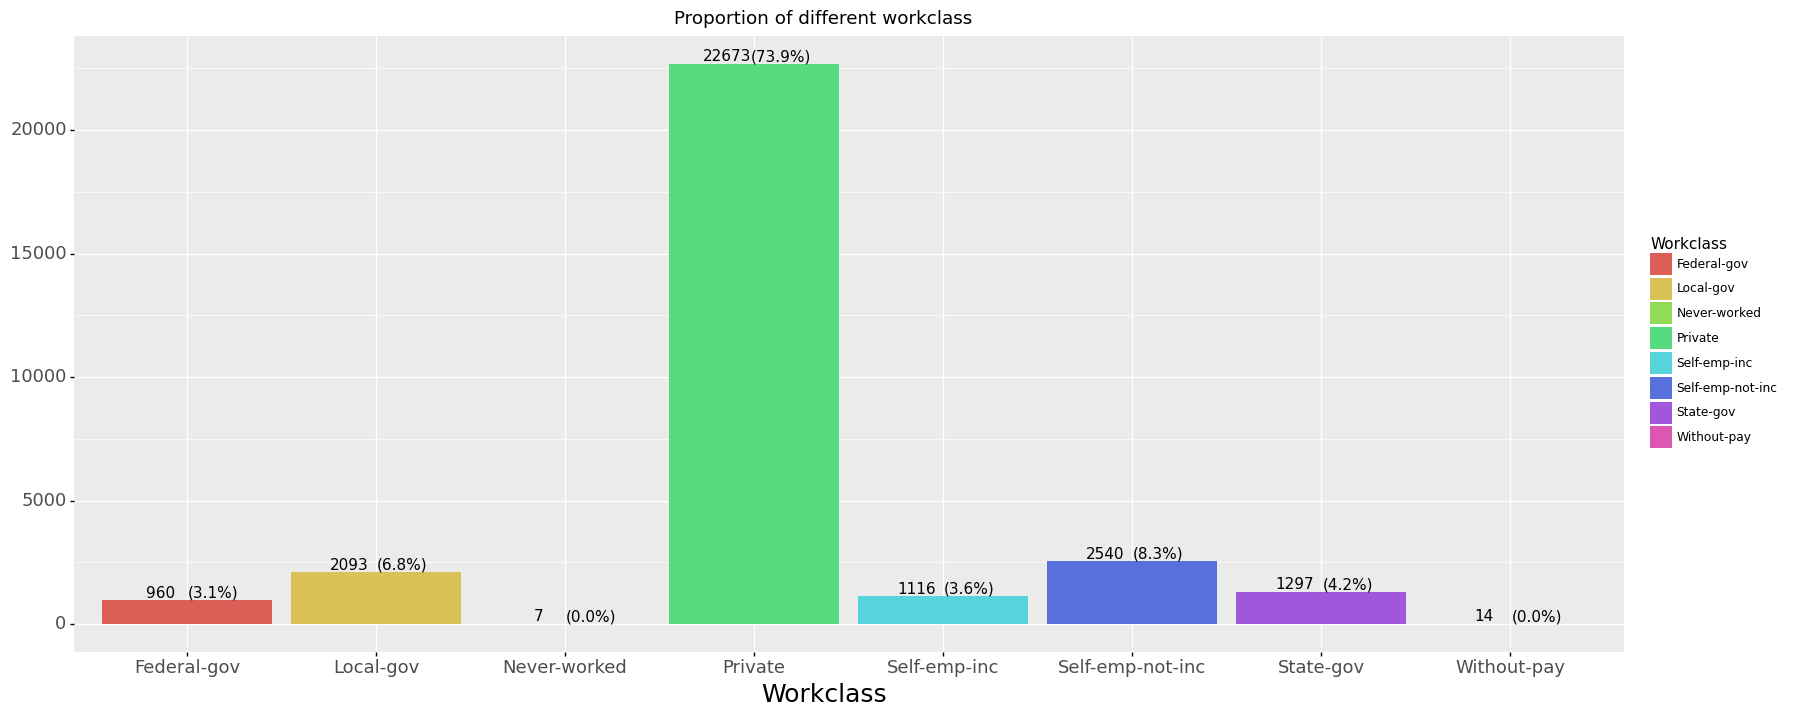

<ggplot: (122008706982)>

In [ ]:
data = df.dropna(subset=['workclass'])
(ggplot(data, aes('workclass', fill='workclass'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('count')),
     stat='count',
     nudge_x=-0.14,
     nudge_y=0.125,
     va='bottom'
 )
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 )+ labs(title='Proportion of different workclass',x='Workclass')
 + theme(figure_size=(20, 8), axis_text_x = element_text(size = 13),axis_text_y = element_text(size = 13), axis_title_y=element_blank(),axis_title = element_text(size = 18))
 + guides(fill = guide_legend(title = 'Workclass'))
)

The proportion of Private Workclass is around 74% and the proportion of all the other columns is not more than 10% making this column imbalance

## Education

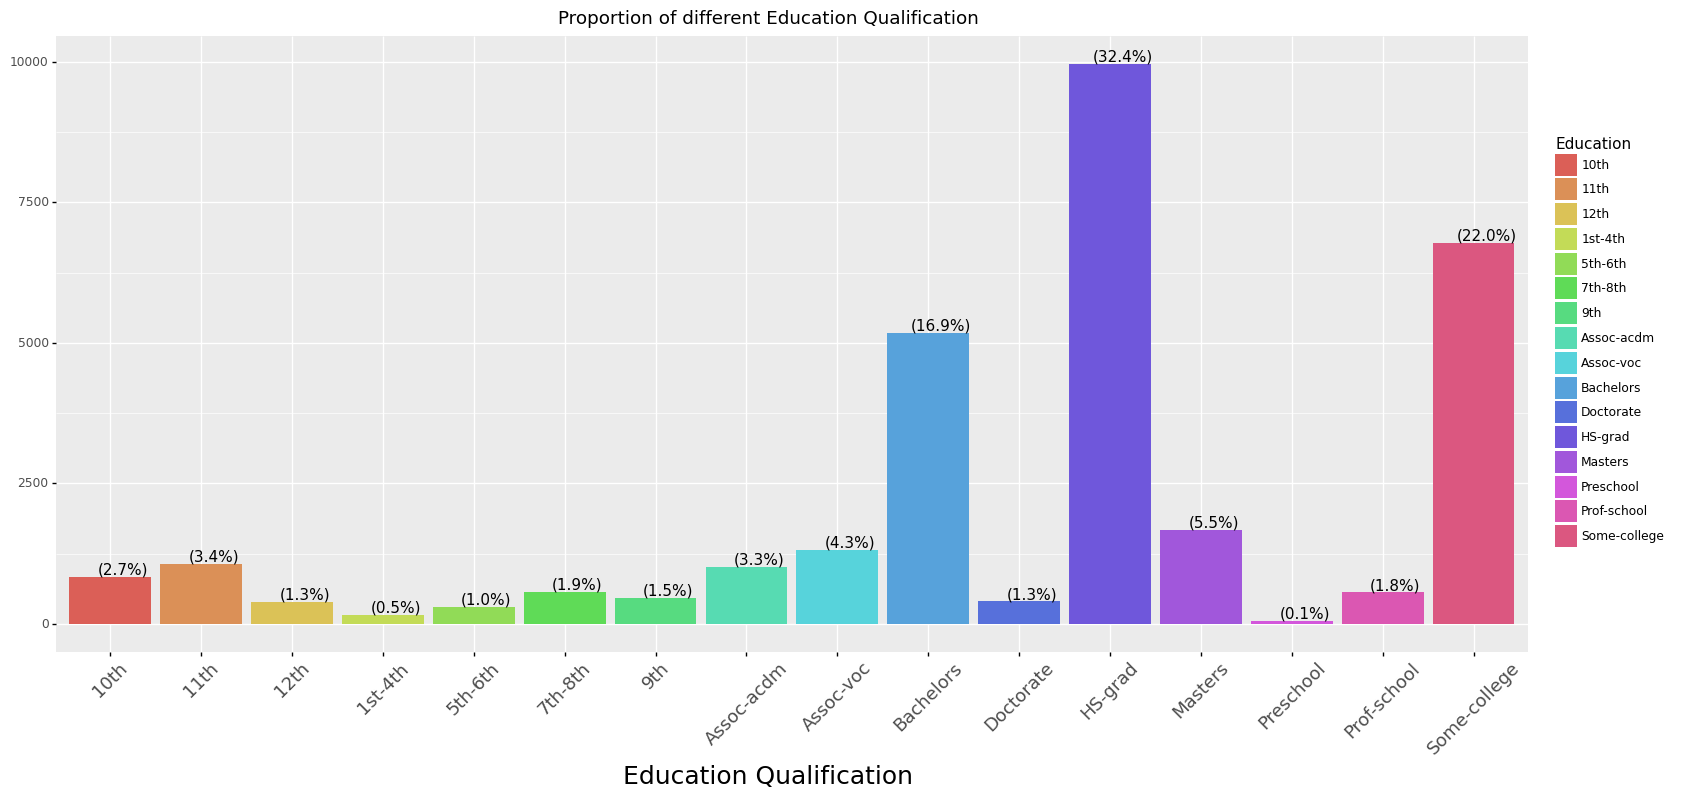

<ggplot: (122009999204)>

In [ ]:
(ggplot(data, aes('education', fill='education'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 )
 + labs(title='Proportion of different Education Qualification',x='Education Qualification')
 + theme(figure_size=(19, 8), axis_text_x = element_text(size = 13,angle=45),axis_title_y=element_blank(),axis_title = element_text(size = 18))
 + guides(fill = guide_legend(title = 'Education'))
)

Most of the individuals in the dataset have completed high school education. Many individuals have attended the college or are still attending the college

## Marital Status

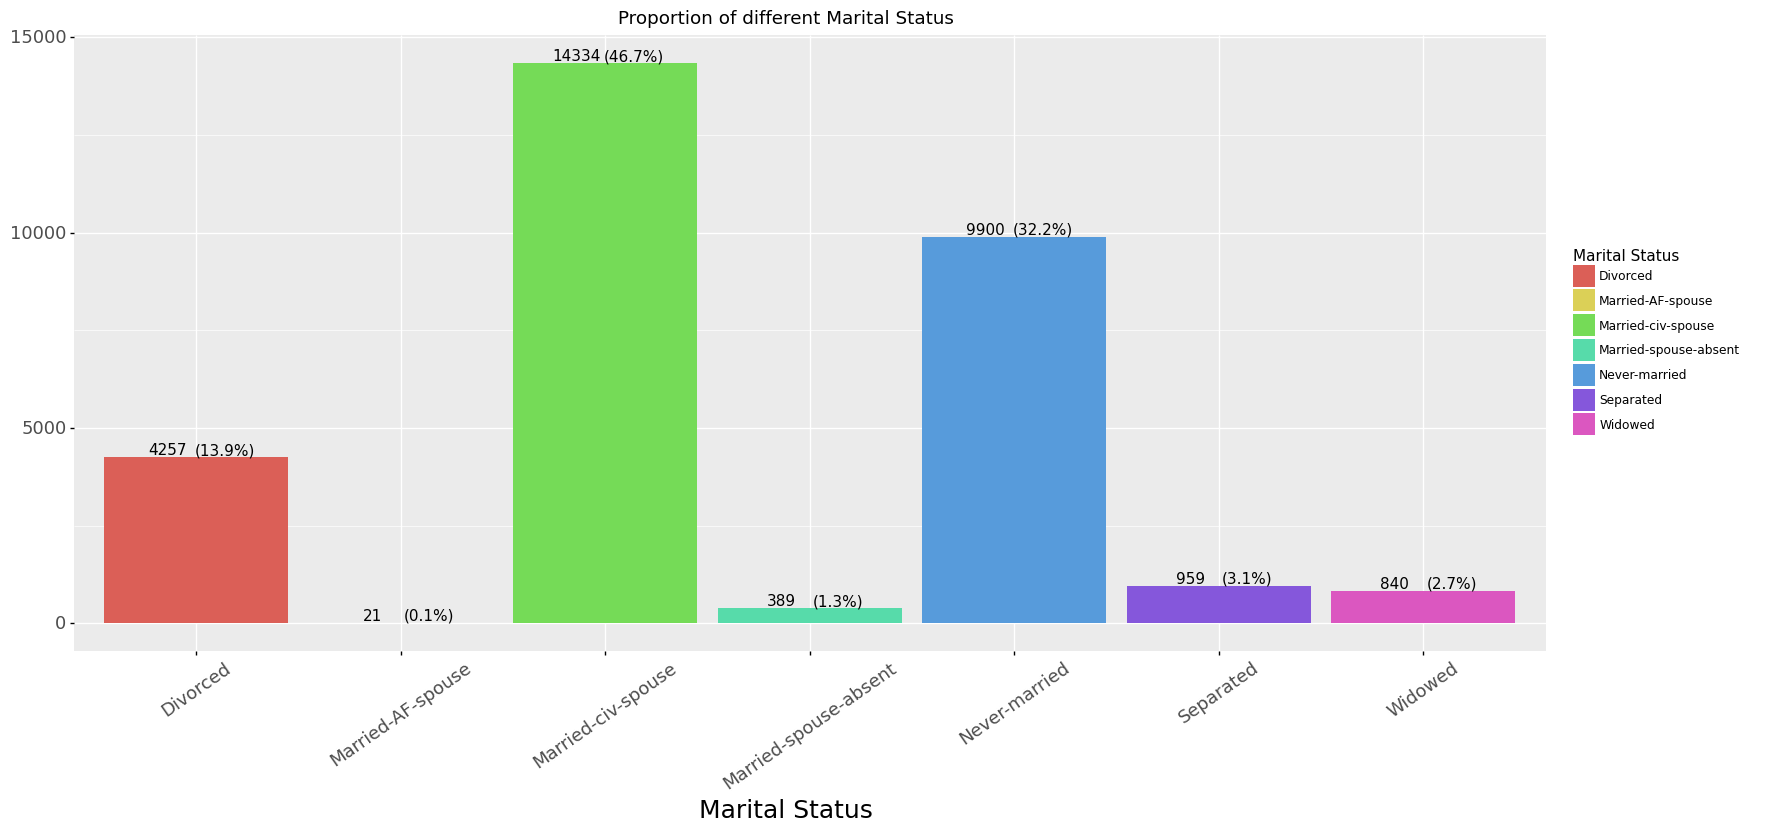

<ggplot: (122008706523)>

In [ ]:
(ggplot(data, aes('marital_status', fill='marital_status'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('count')),
     stat='count',
     nudge_x=-0.14,
     nudge_y=0.125,
     va='bottom'
 )
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 ) 
 + labs(title='Proportion of different Marital Status',x='Marital Status')
 + theme(figure_size=(19, 8), axis_text_x = element_text(size = 13,angle=35),axis_text_y = element_text(size = 13), axis_title_y=element_blank(),axis_title = element_text(size = 18))
  + guides(fill = guide_legend(title = 'Marital Status'))
)

Around **47%** of individuals are married and have civic-spouse and around 32% individuals are unmarried

## Occupation

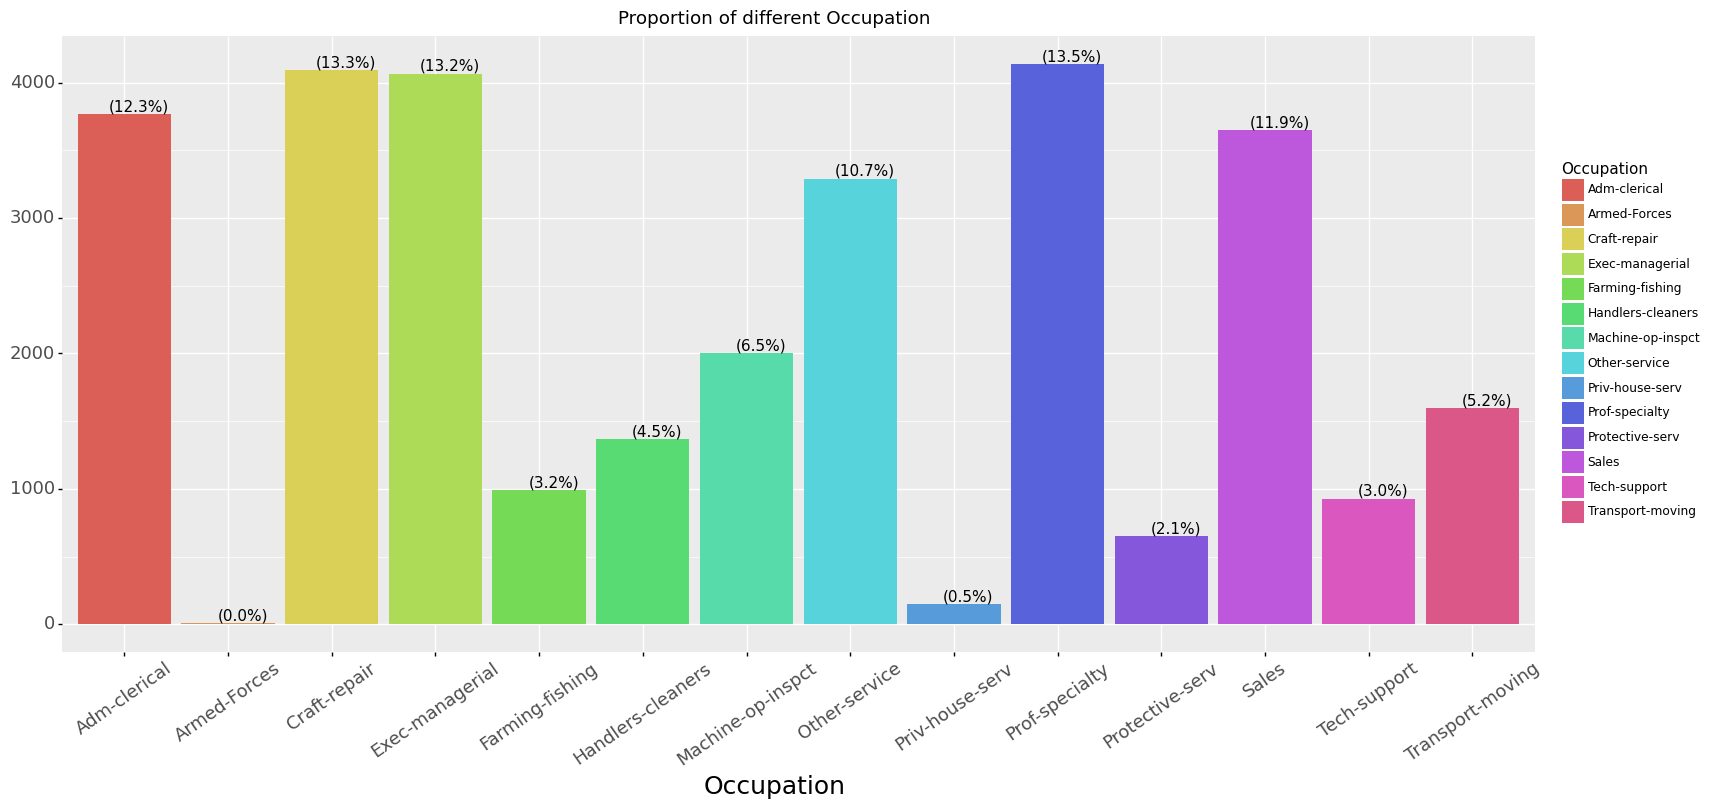

<ggplot: (122003918248)>

In [ ]:
data = df.dropna(subset=['occupation'])
(ggplot(data, aes('occupation', fill='occupation'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 )
 + labs(title='Proportion of different Occupation',x='Occupation')
 + theme(figure_size=(19, 8), axis_text_x = element_text(size = 13,angle=35),axis_text_y = element_text(size = 13), axis_title_y=element_blank(),axis_title = element_text(size = 18))
+ guides(fill = guide_legend(title = 'Occupation'))
)

The individuals in the dataset have diverse occupations. There is no incline towards a single profession. 

##  Relationship Status

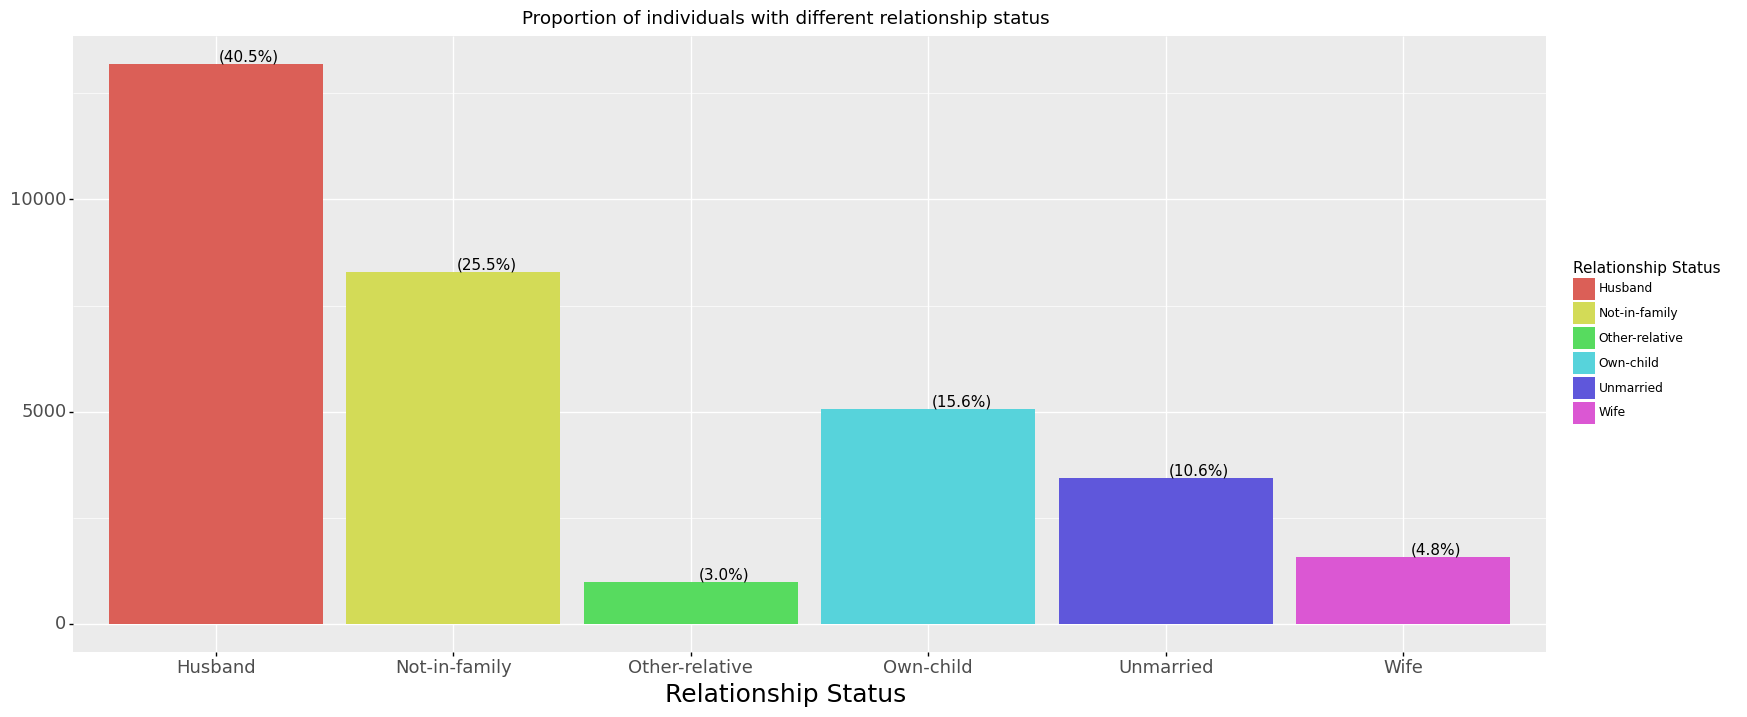

<ggplot: (122008697310)>

In [ ]:
data = df.dropna(subset=['relationship_status'])
(ggplot(data, aes('relationship_status', fill='relationship_status'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 )
 + labs(title='Proportion of individuals with different relationship status',x='Relationship Status')
 + theme(figure_size=(19, 8), axis_text_x = element_text(size = 13),axis_text_y = element_text(size = 13), axis_title_y=element_blank(),axis_title = element_text(size = 18))
+ guides(fill = guide_legend(title = 'Relationship Status'))
)

There is a large proportion of husbands in the dataset and following individuals with No Family

## Race

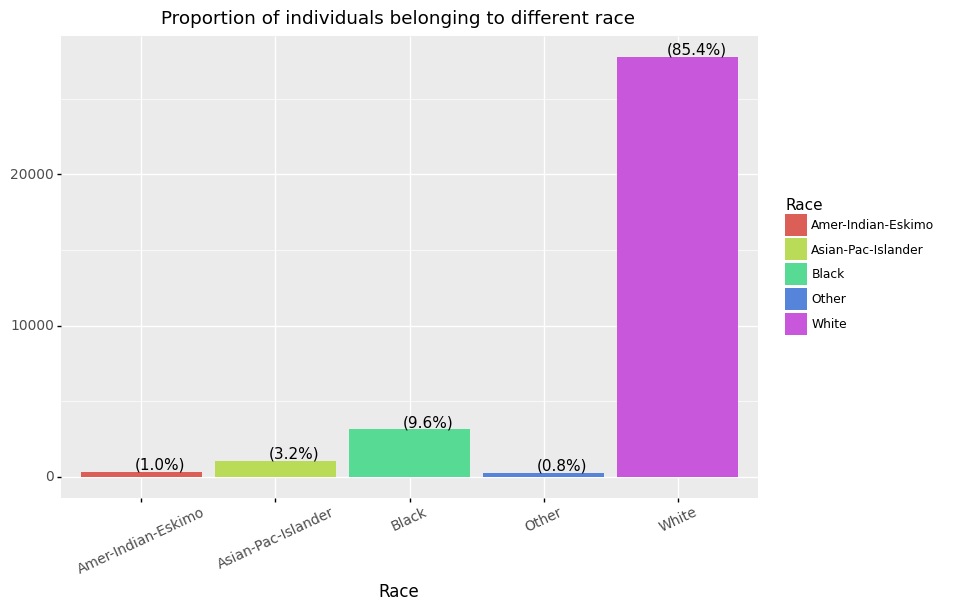

<ggplot: (122015332980)>

In [ ]:
(ggplot(data, aes('race', fill='race'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 ) 
 + labs(title='Proportion of individuals belonging to different race',x='Race')
 + theme(figure_size=(9, 6), axis_text_x = element_text(size = 10,angle=25),axis_text_y = element_text(size = 10), axis_title_y=element_blank(),axis_title = element_text(size = 12))
+ guides(fill = guide_legend(title = 'Race'))
)

Most of the individuals in the dataset are White making racial imbalance in the dataset

##  Sex

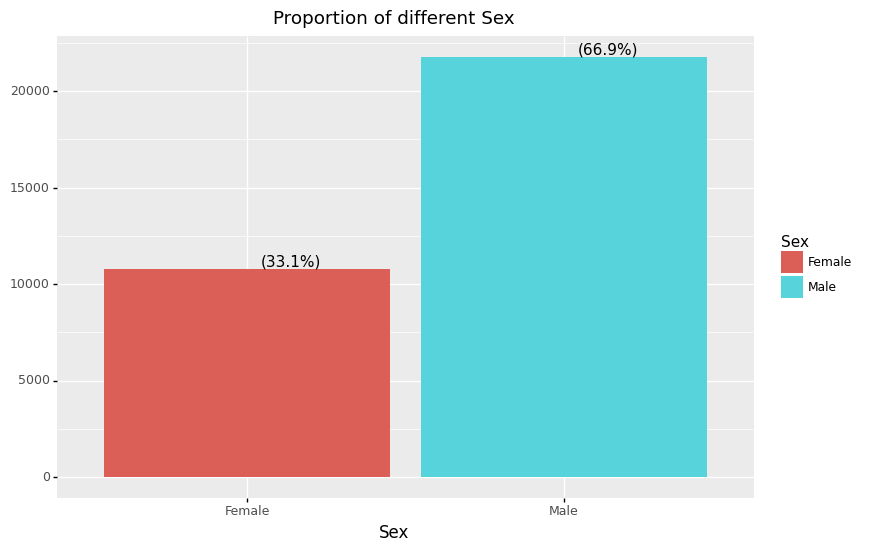

<ggplot: (122015292401)>

In [ ]:
(ggplot(data, aes('sex', fill='sex'))
 + geom_bar()
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.14,
     nudge_y=0.125,
     va='bottom',
     format_string='({:.1f}%)'
 )
 + labs(title='Proportion of different Sex',x='Sex')
 + theme(figure_size=(9, 6), axis_text_x = element_text(size = 9),axis_text_y = element_text(size = 9), axis_title_y=element_blank(),axis_title = element_text(size = 12))
+ guides(fill = guide_legend(title = 'Sex'))
)

The proportion of male and female in the dataset are 33% and 67% respectively

##  Native Country

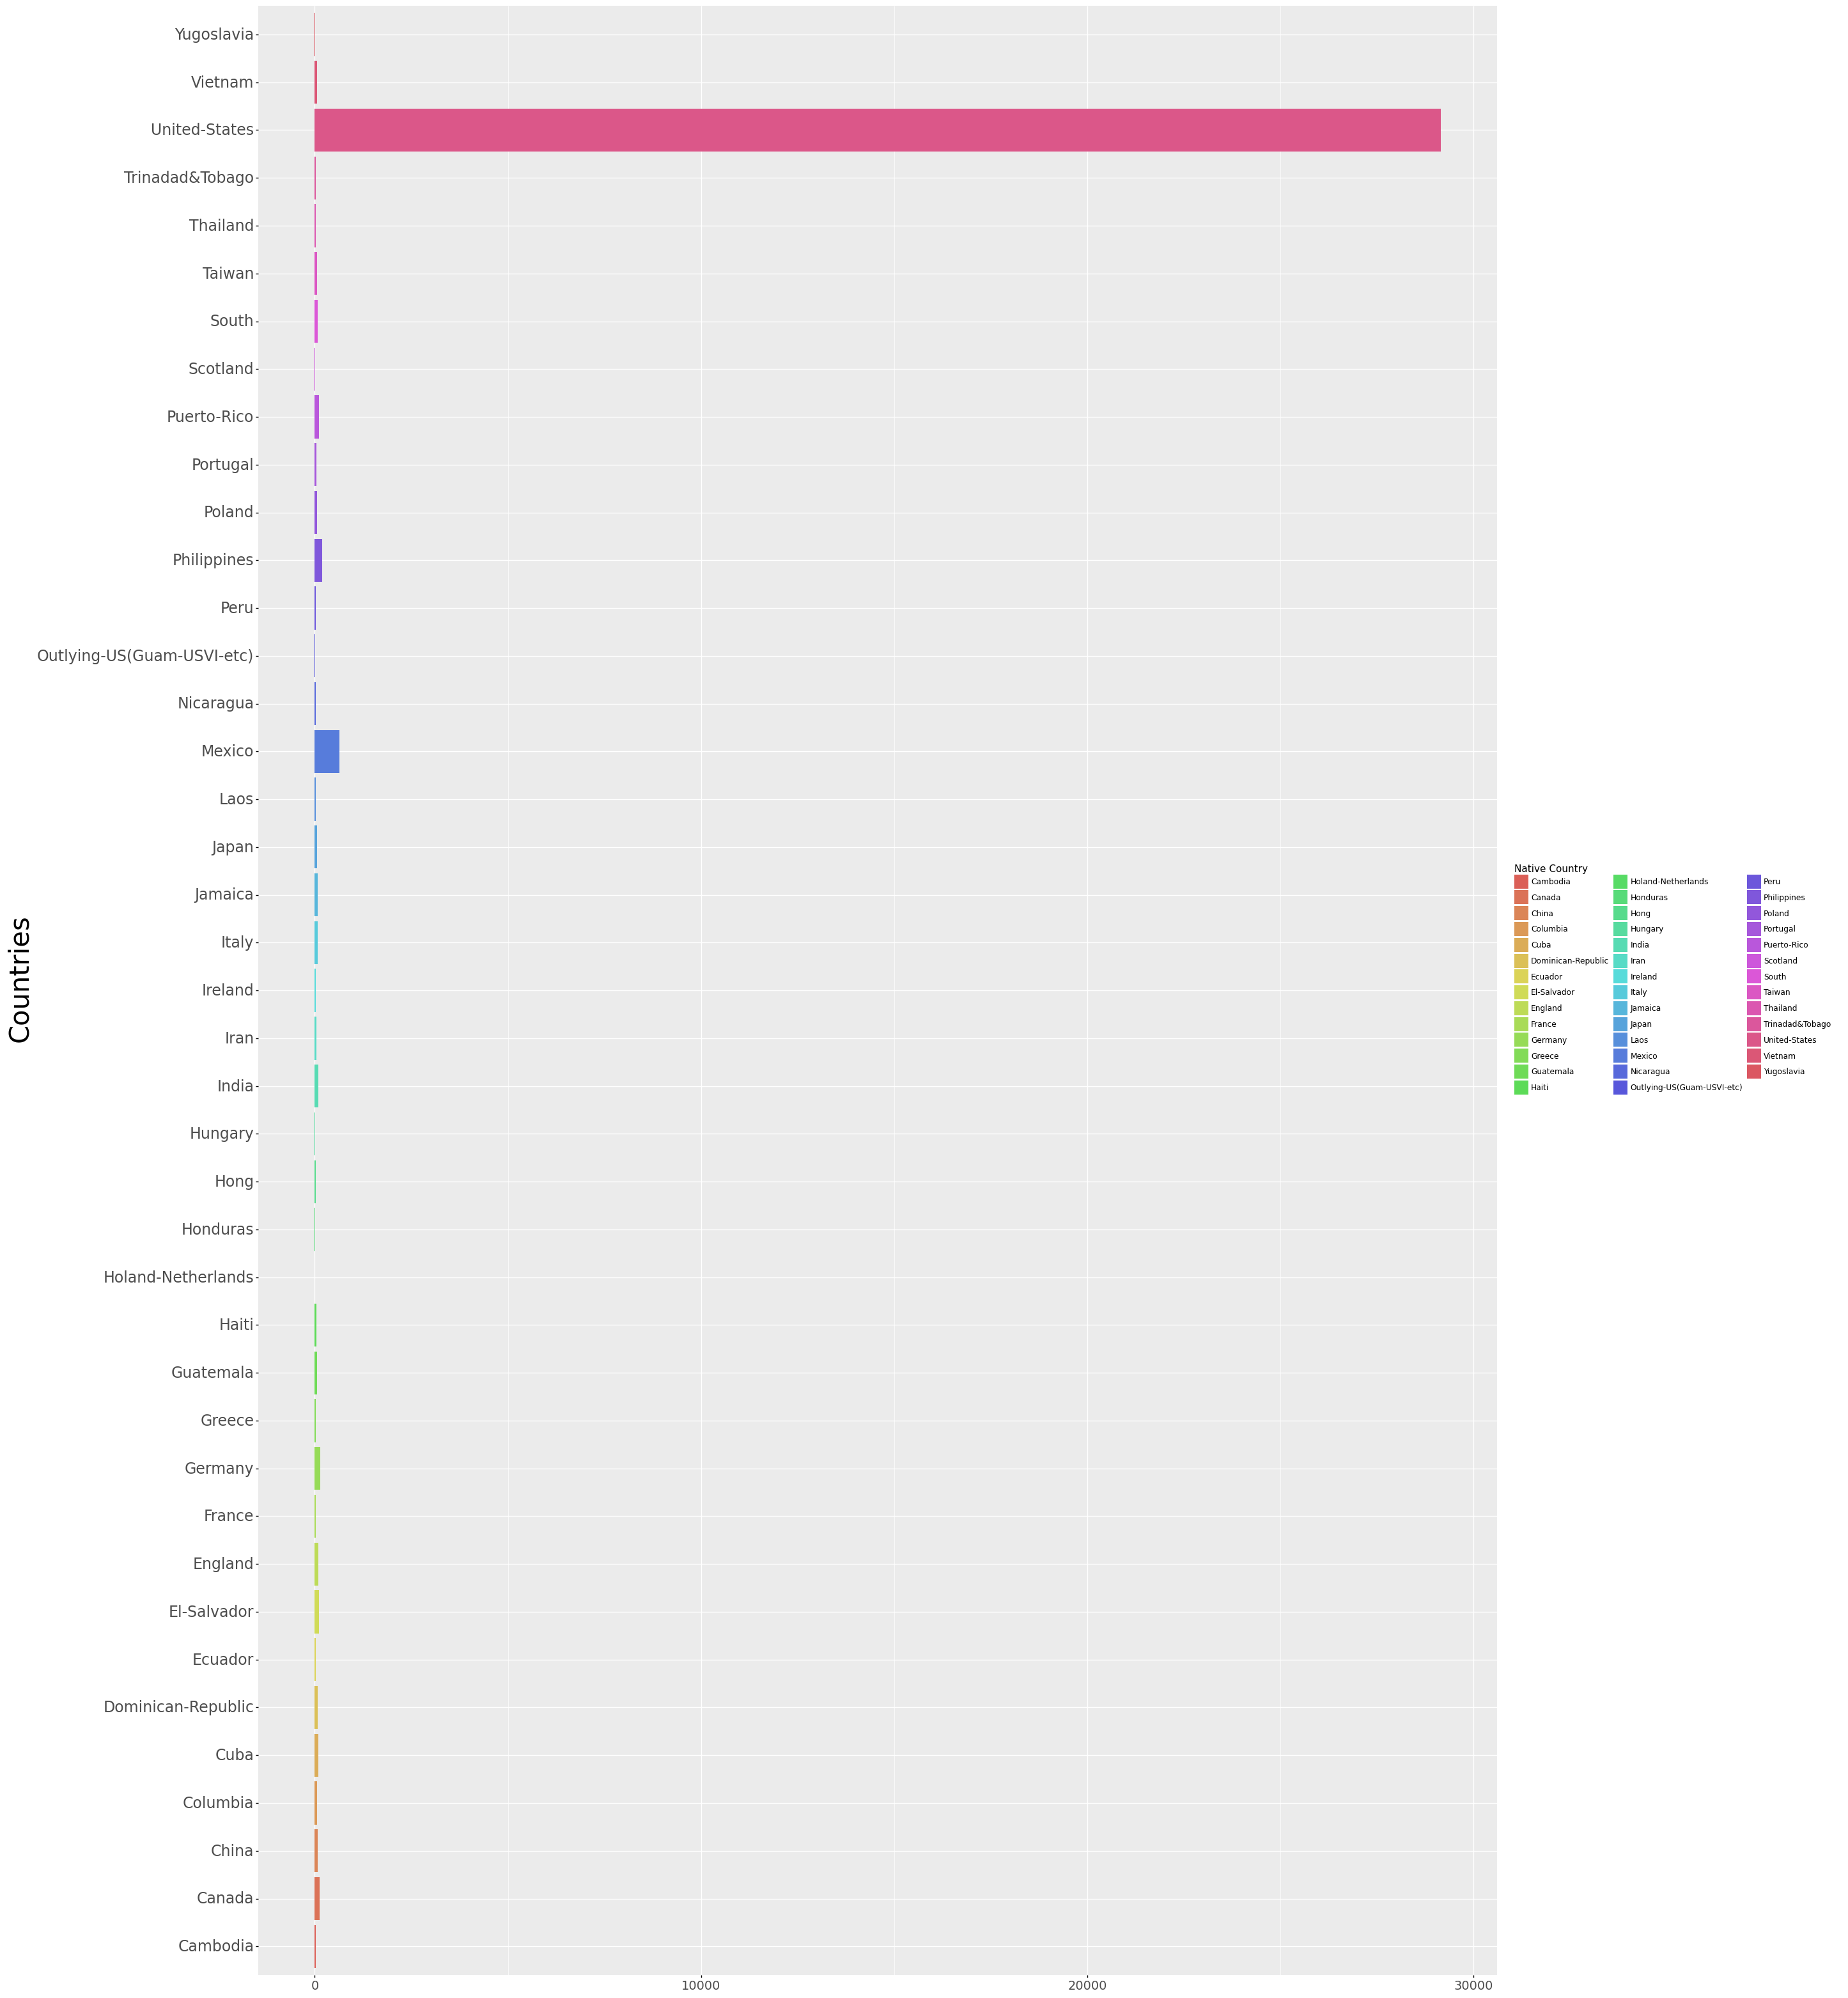

<ggplot: (122013809755)>

In [ ]:
data = df.dropna(subset=['native_country'])
(ggplot(data, aes('native_country', fill='native_country'))
 + geom_bar()
 + coord_flip()
 + labs(x='Countries')
 + theme(figure_size=(25, 40), axis_text_x = element_text(size = 14),axis_text_y = element_text(size = 17), axis_title_x=element_blank(),axis_title = element_text(size = 30))
+ guides(fill = guide_legend(title = 'Native Country'))
)

Most of the individuals in the dataset belongs from United States making imbalance in the dataset

# Bivariate Analysis

## Quantative Variables

### Age

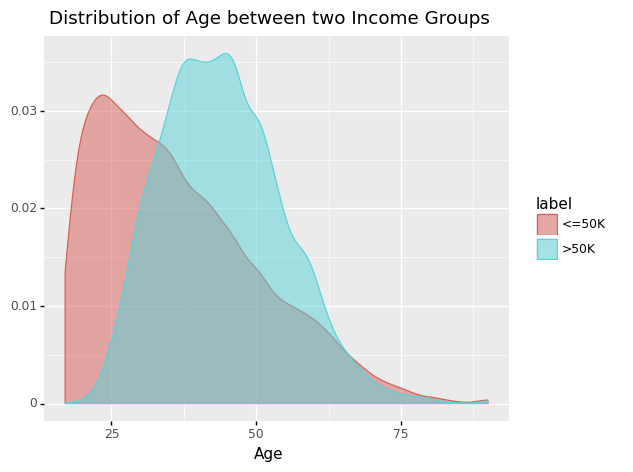

<ggplot: (122015343415)>

In [ ]:
(
  ggplot(df)         
 + aes(x='age',fill='label',color='label')
 + geom_density(alpha=0.5)
 + labs(title='Distribution of Age between two Income Groups', x = 'Age',y='Density',legend='Income')
 + theme(figure_size=(6, 5),axis_title_y = element_blank())
)

Distribution of age variable is highly right skewed with income group of <=50K. 

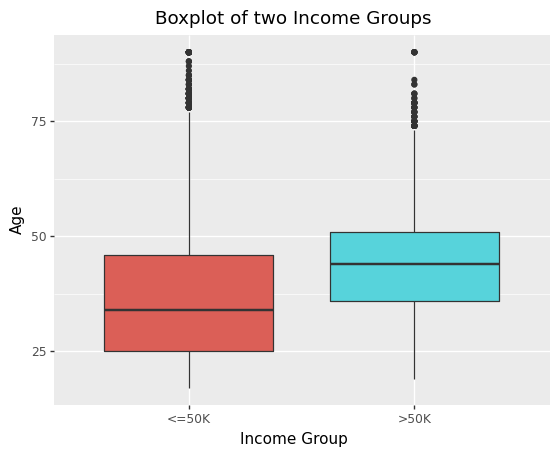

<ggplot: (8761917541157)>

In [ ]:
(
  ggplot(df)+ 
  aes(x='label', y='age',fill='label') +
  labs(title='Boxplot of two Income Groups', x = 'Income Group',y='Age',legend='Income') +
  geom_boxplot(show_legend=False)
)

From boxplot it is clearly visible that median age of high-income group is higher which means older generation earns more than younger generation

### Years of Education

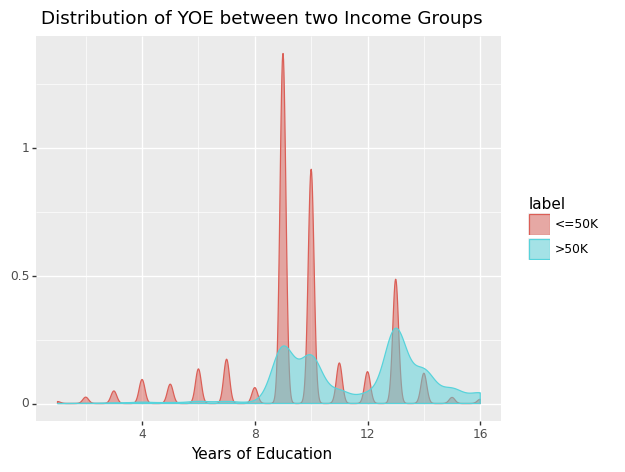

<ggplot: (8757620373885)>

In [ ]:
(
  ggplot(df)         
 + aes(x='yrs_of_education',fill='label',color='label')
 + geom_density(alpha=0.5)
 + labs(title='Distribution of YOE between two Income Groups', x = 'Years of Education',legend='Income')
 + theme(figure_size=(6, 5),axis_title_y = element_blank())
)

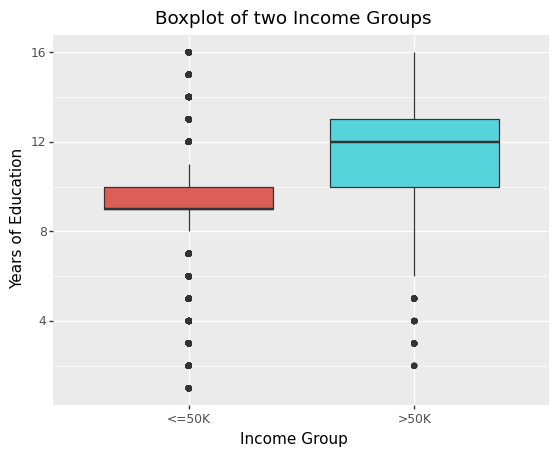

<ggplot: (8761917558245)>

In [ ]:
(
  ggplot(df)+ 
  aes(x='label', y='yrs_of_education',fill='label') +
  labs(title='Boxplot of two Income Groups', x = 'Income Group',y='Years of Education',legend='Income') +
  geom_boxplot(show_legend=False)
)

Higher income group have more years of education

### Capital Gain

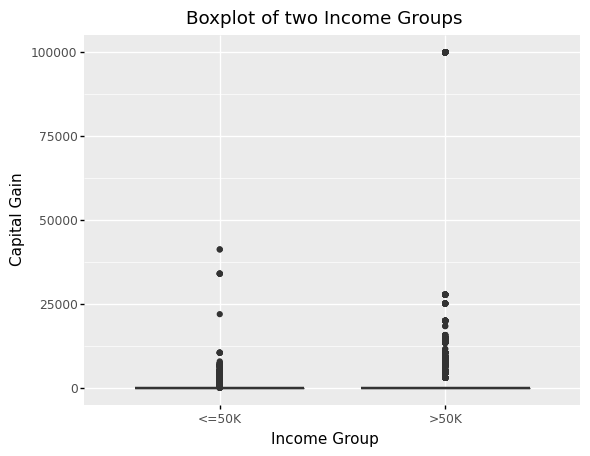

<ggplot: (122008471546)>

In [ ]:
(
  ggplot(df)+ 
  aes(x='label', y='capital_gain',fill='label') +
  labs(title='Boxplot of two Income Groups', x = 'Income Group',y='Capital Gain',legend='Income') +
  geom_boxplot(show_legend=False)
)

From boxplot it is clearly visible that there is a huge gap in the capital gain between the two income groups with many outliers

### Capital Loss

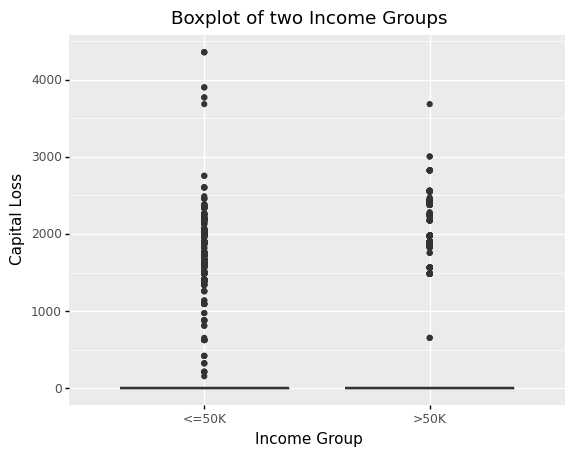

<ggplot: (122009952662)>

In [ ]:
(
  ggplot(df)+ 
  aes(x='label', y='capital_loss',fill='label') +
  labs(title='Boxplot of two Income Groups', x = 'Income Group',y='Capital Loss',legend='Income') +
  geom_boxplot(show_legend=False)
)

### Working Hours per Week

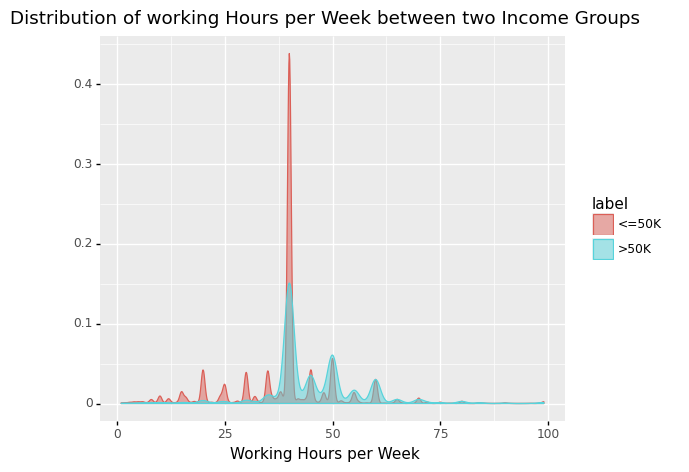

<ggplot: (122019207742)>

In [ ]:
(
  ggplot(df)         
 + aes(x='working_hrs_per_week',fill='label',color='label')
 + geom_density(alpha=0.5)
 + labs(title='Distribution of working Hours per Week between two Income Groups', x = 'Working Hours per Week',legend='Income')
 + theme(figure_size=(6, 5),axis_title_y = element_blank())
)

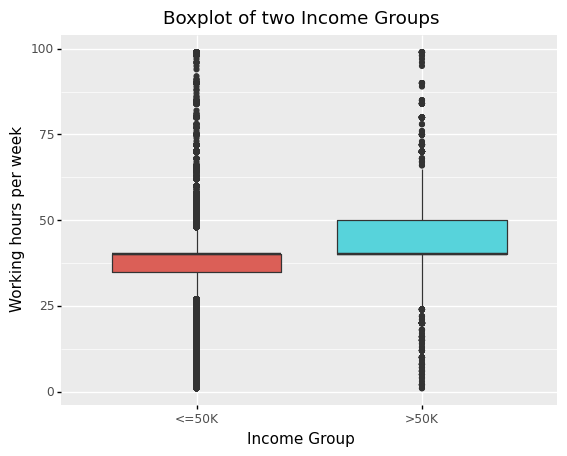

<ggplot: (122015273474)>

In [ ]:
(
  ggplot(df)+ 
  aes(x='label', y='working_hrs_per_week',fill='label') +
  labs(title='Boxplot of two Income Groups', x = 'Income Group',y='Working hours per week',legend='Income') +
  geom_boxplot(show_legend=False)
)

The individuals in higher income group  have long working hours per week

## Categorical Variables

### Occupation

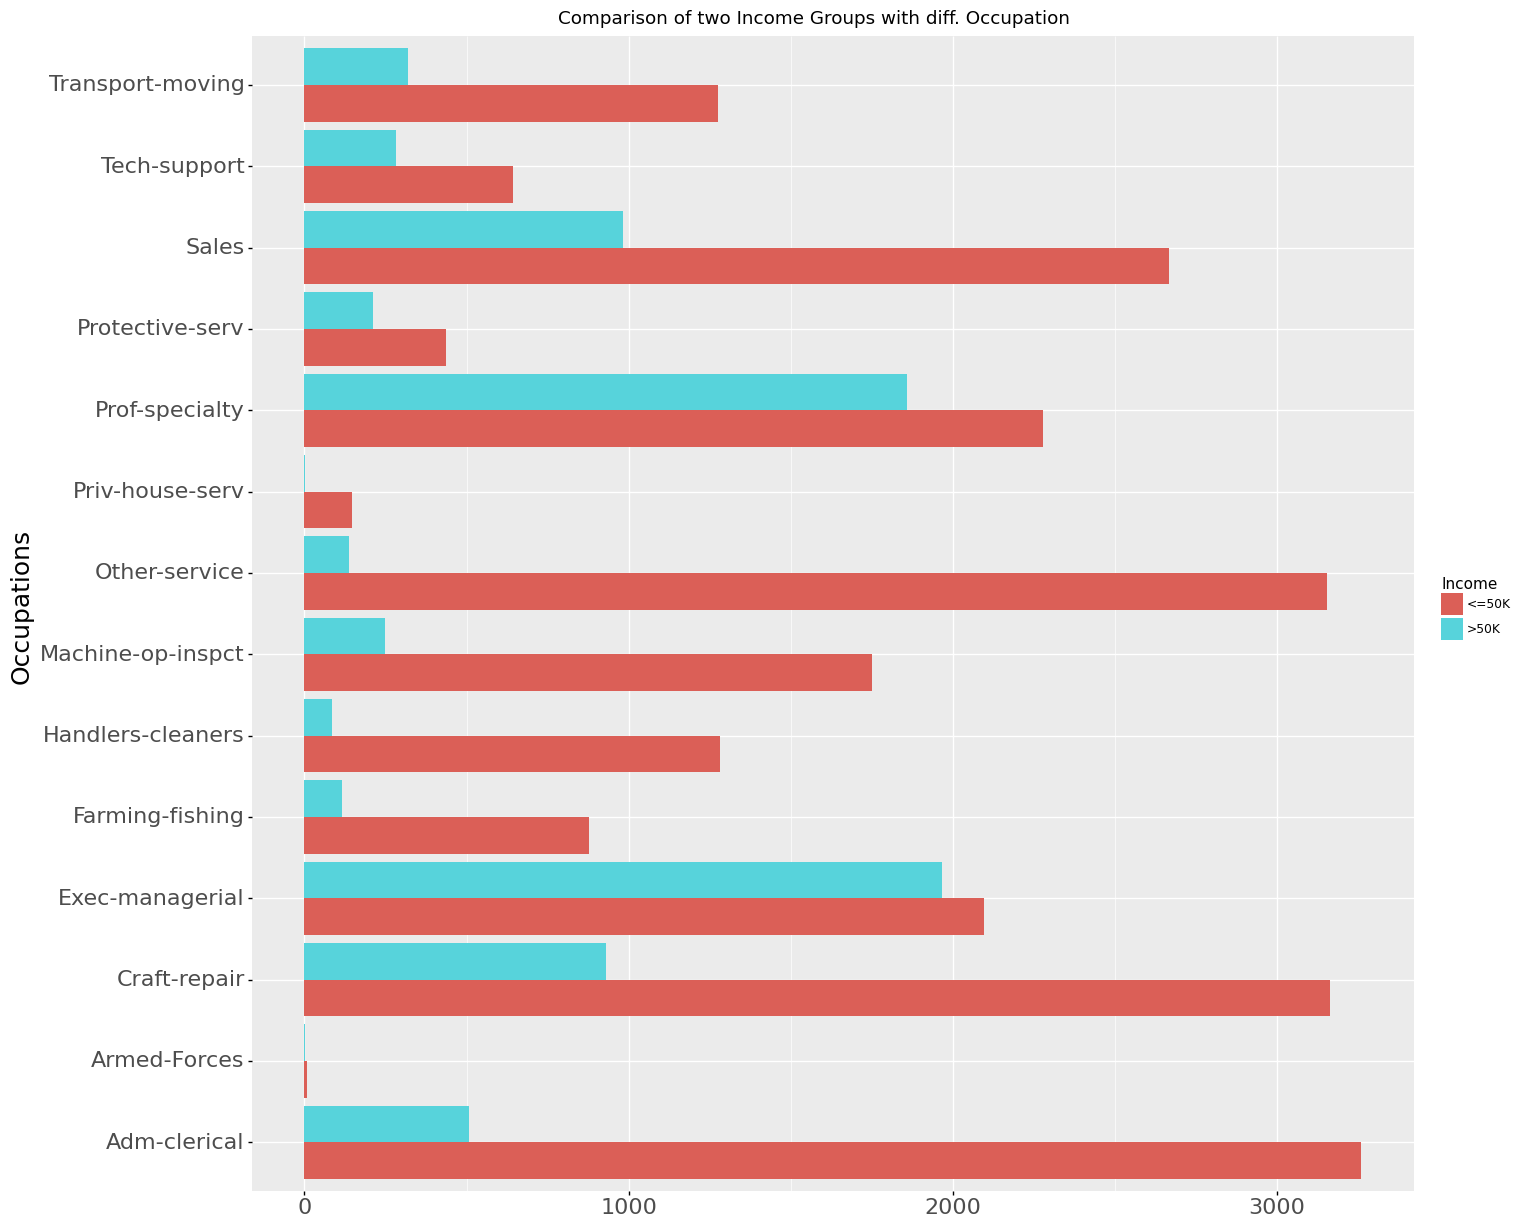

<ggplot: (122005642057)>

In [ ]:
work_data = df.groupby(['label','occupation']).age.count()
work_data = work_data.reset_index(name='counts')
work_data
(
  ggplot(work_data)+ 
  aes(x='occupation',y='counts',fill='label') +
  geom_bar(stat = "identity", position = "dodge") + 
  coord_flip() +
  labs(title='Comparison of two Income Groups with diff. Occupation', x = 'Occupations',legend='Income') +
  theme(figure_size=(15, 15),axis_title_x = element_blank(),
        axis_text_x = element_text(size = 16),axis_text_y = element_text(size = 16),
        axis_title = element_text(size = 18))
+ guides(fill = guide_legend(title = 'Income'))
)

1. Most of the individuals with higher income group are either specialist or executive manager

2. Most of the individuals with less income group are farm clerks, craft repairs, cleaners and machine operation inspector 


### Race 

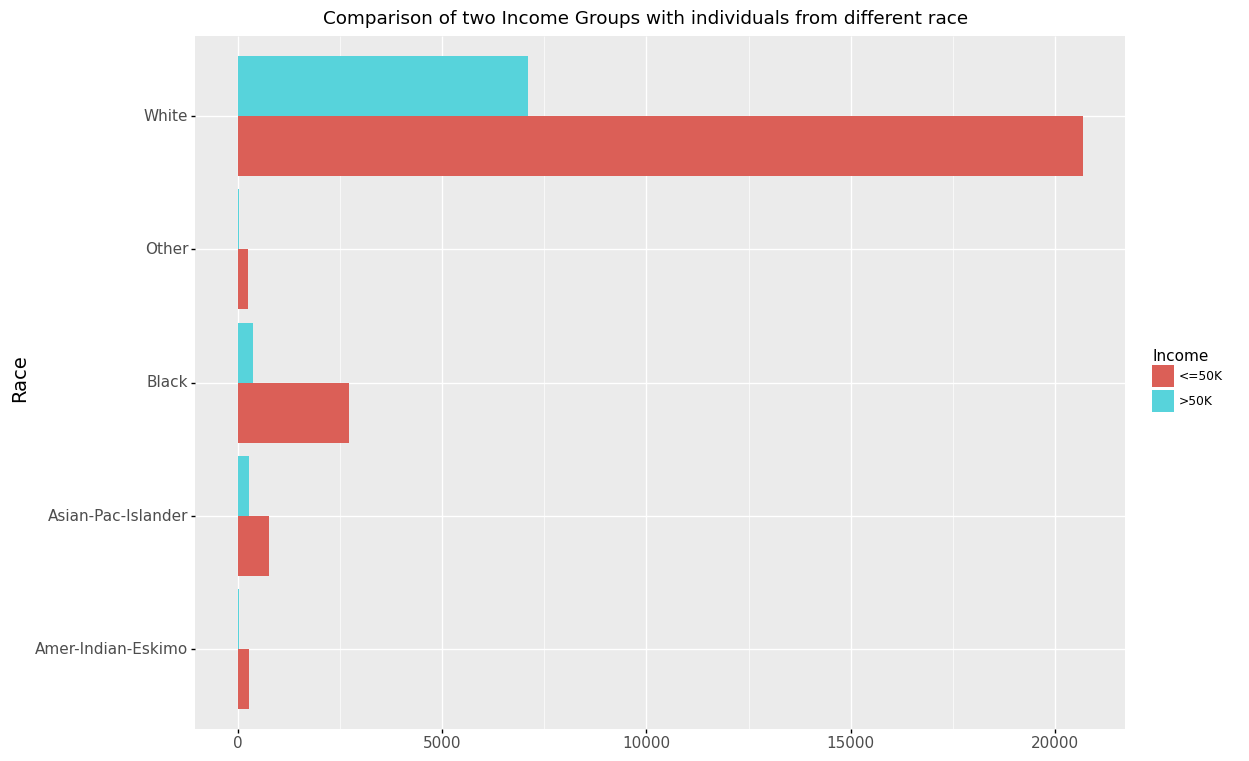

<ggplot: (122005669282)>

In [ ]:
work_data = df.groupby(['label','race']).age.count()
work_data = work_data.reset_index(name='counts')
work_data
(
  ggplot(work_data)+ 
  aes(x='race',y='counts',fill='label') +
  geom_bar(stat = "identity", position = "dodge") + 
  coord_flip() +
  labs(title='Comparison of two Income Groups with individuals from different race', x = 'Race',legend='Income') +
  theme(figure_size=(12, 9),axis_title_x = element_blank(),
        axis_text_x = element_text(size = 11),axis_text_y = element_text(size = 11),
        axis_title = element_text(size = 14))
+ guides(fill = guide_legend(title = 'Income'))
)

The data is highly imbalance in terms of race. We can't make inference on this data

### Relationship Status

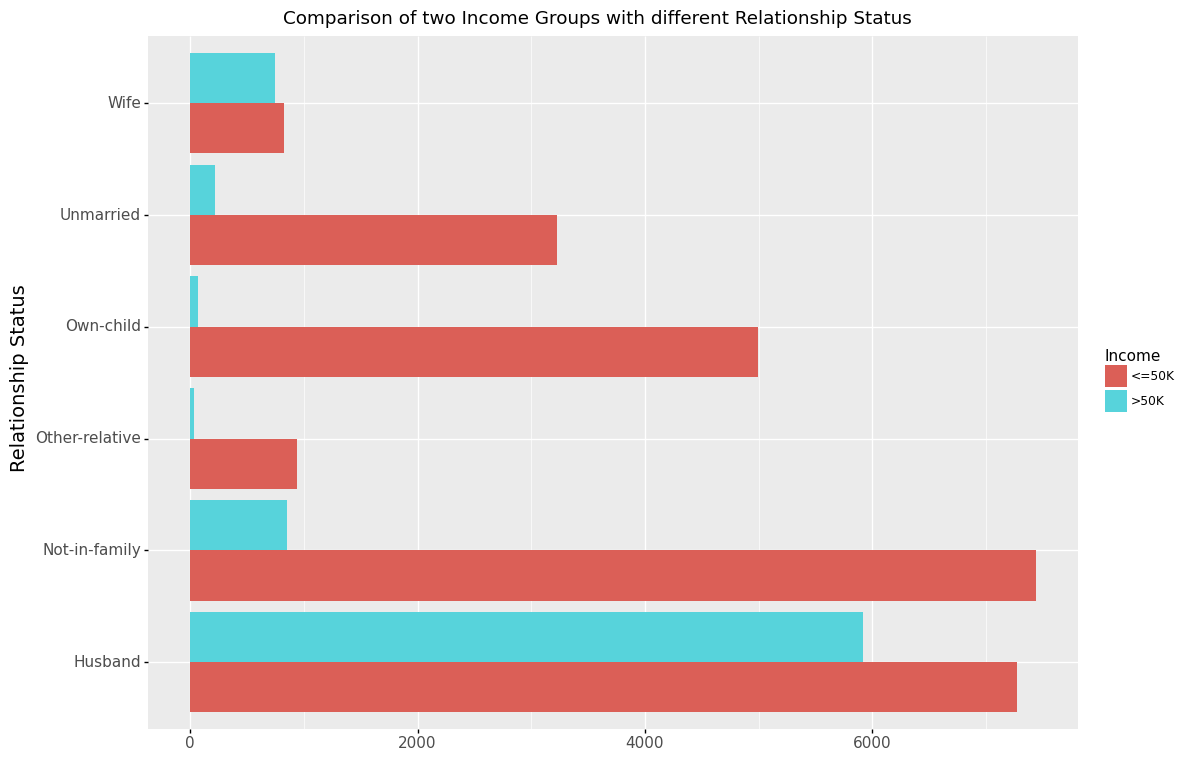

<ggplot: (122005680249)>

In [ ]:
work_data = df.groupby(['label','relationship_status']).age.count()
work_data = work_data.reset_index(name='counts')
work_data
(
  ggplot(work_data)+ 
  aes(x='relationship_status',y='counts',fill='label') +
  geom_bar(stat = "identity", position = "dodge") + 
  coord_flip() +
  labs(title='Comparison of two Income Groups with different Relationship Status', x = 'Relationship Status',legend='Income') +
  theme(figure_size=(12, 9),axis_title_x = element_blank(),
        axis_text_x = element_text(size = 11),axis_text_y = element_text(size = 11),
        axis_title = element_text(size = 14))
+ guides(fill = guide_legend(title = 'Income'))
)

Individuals which are not in familyand have childern are mostly earning less than 50K 

### Marital Status 

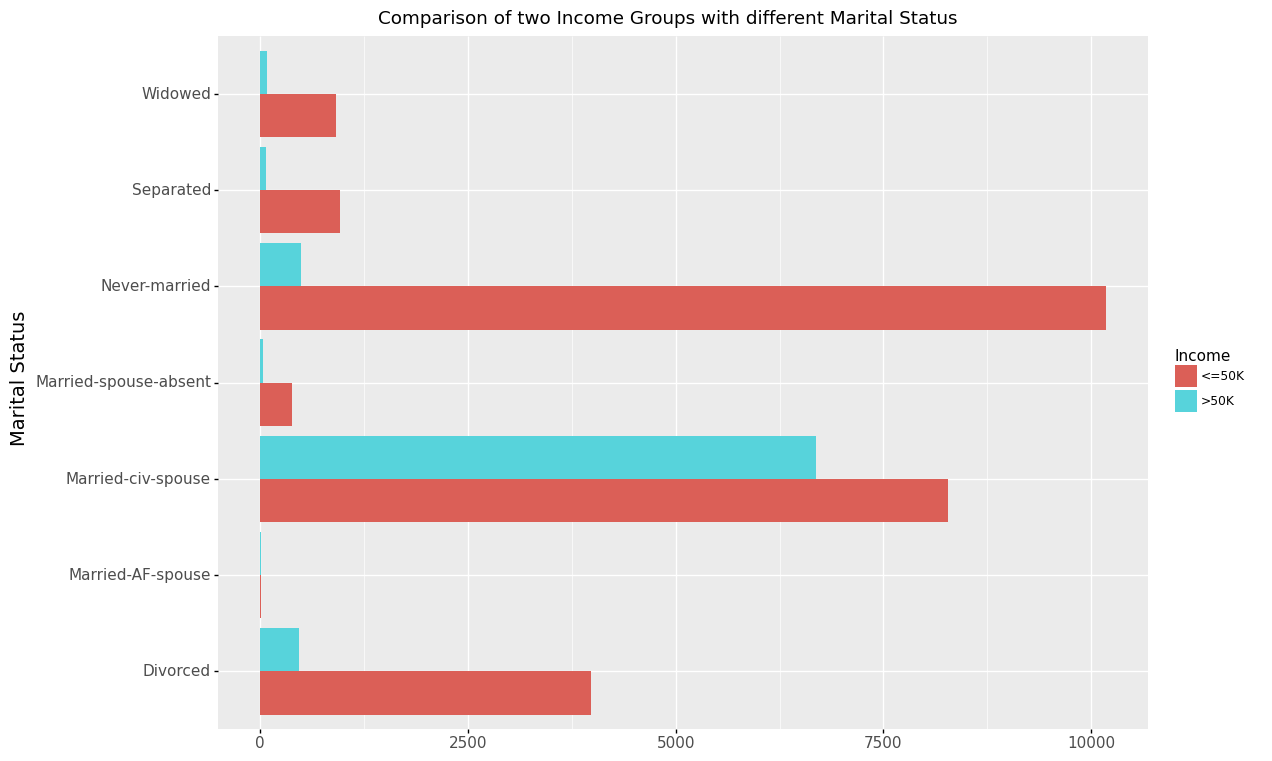

<ggplot: (122005642012)>

In [ ]:
work_data = df.groupby(['label','marital_status']).age.count()
work_data = work_data.reset_index(name='counts')
work_data
(
  ggplot(work_data)+ 
  aes(x='marital_status',y='counts',fill='label') +
  geom_bar(stat = "identity", position = "dodge") + 
  coord_flip() +
  labs(title='Comparison of two Income Groups with different Marital Status', x = 'Marital Status',legend='Income') +
  theme(figure_size=(12, 9),axis_title_x = element_blank(),
        axis_text_x = element_text(size = 11),axis_text_y = element_text(size = 11),
        axis_title = element_text(size = 14))
+ guides(fill = guide_legend(title = 'Income'))
)

1. The majority of the sample's with <=50K income are Never Married, married to civic spouse or divorced. 
2. On the other hand majority of the sample's with >50K income married to civic spouse.

###  Workclass

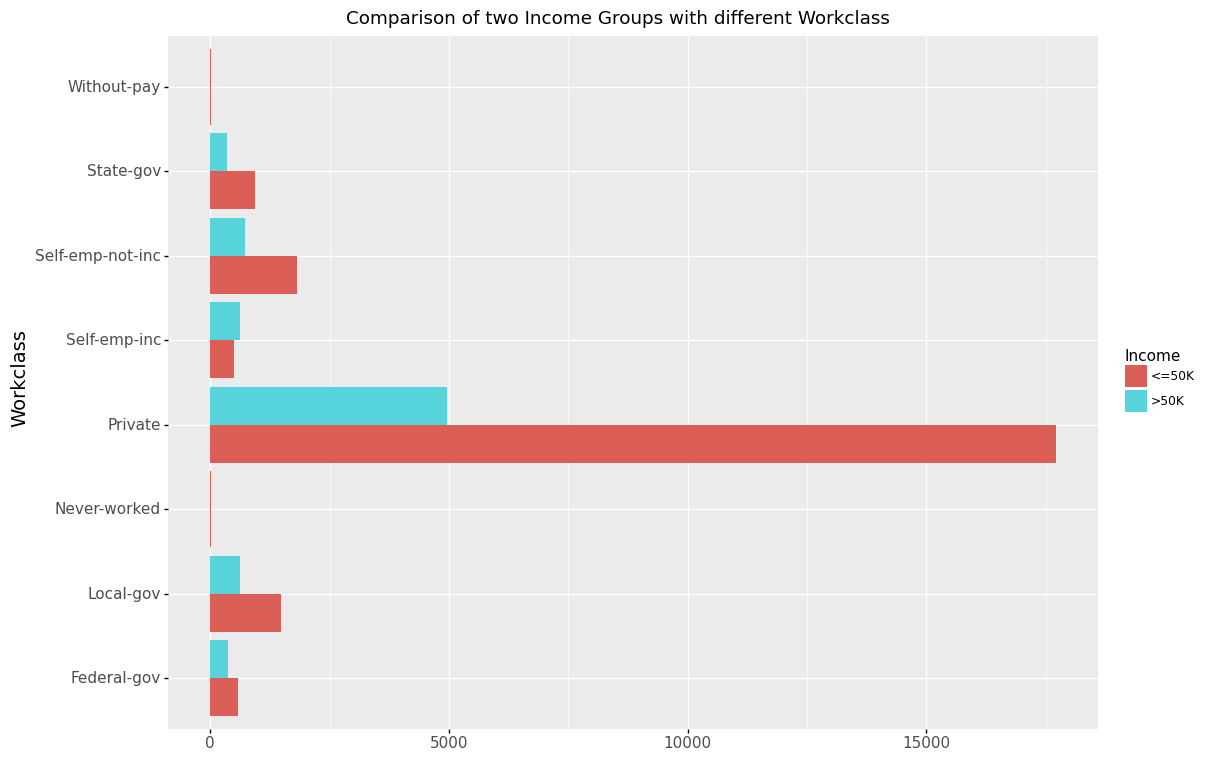

<ggplot: (122014278572)>

In [ ]:
work_data = df.groupby(['label','workclass']).age.count()
work_data = work_data.reset_index(name='counts')
work_data
(
  ggplot(work_data)+ 
  aes(x='workclass',y='counts',fill='label') +
  geom_bar(stat = "identity", position = "dodge") + 
  coord_flip() +
  labs(title='Comparison of two Income Groups with different Workclass', x = 'Workclass',legend='Income') +
  theme(figure_size=(12, 9),axis_title_x = element_blank(),
        axis_text_x = element_text(size = 11),axis_text_y = element_text(size = 11),
        axis_title = element_text(size = 14))
+ guides(fill = guide_legend(title = 'Income'))
)

The majority of the sample's in the workclass is private. There is a clear imbalance inside internal income of private workclass 

###  Education

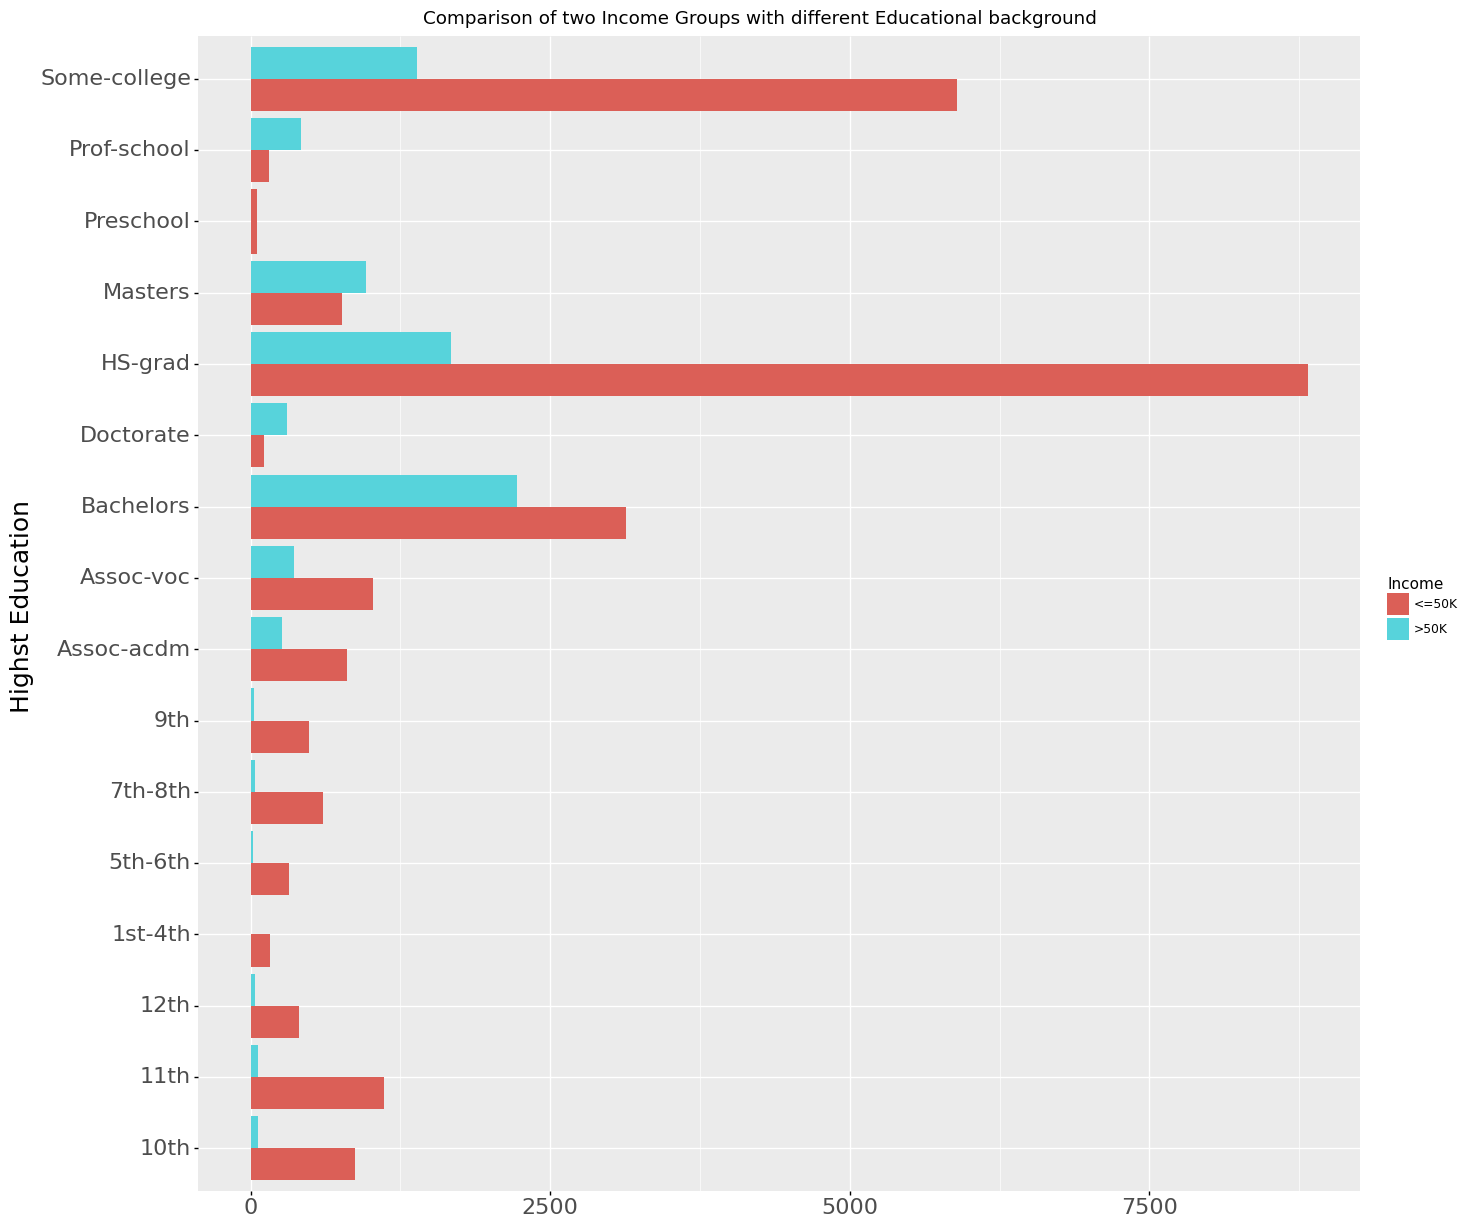

<ggplot: (122016425528)>

In [ ]:
work_data = df.groupby(['label','education']).age.count()
work_data = work_data.reset_index(name='counts')
work_data
(
  ggplot(work_data)+ 
  aes(x='education',y='counts',fill='label') +
  geom_bar(stat = "identity", position = "dodge") + 
  coord_flip() +
  labs(title='Comparison of two Income Groups with different Educational background', x = 'Highst Education',legend='Income') +
  theme(figure_size=(15, 15),axis_title_x = element_blank(),
        axis_text_x = element_text(size = 16),axis_text_y = element_text(size = 16),
        axis_title = element_text(size = 18))
+ guides(fill = guide_legend(title = 'Income'))
)

1. Most of the individuals earning more than 50K are atteneding college or have completed college education
2. Most of the individuals earning <=50K are high school graduate
3. There is high imbalance in internal income class of High school graduates

###  Native Country

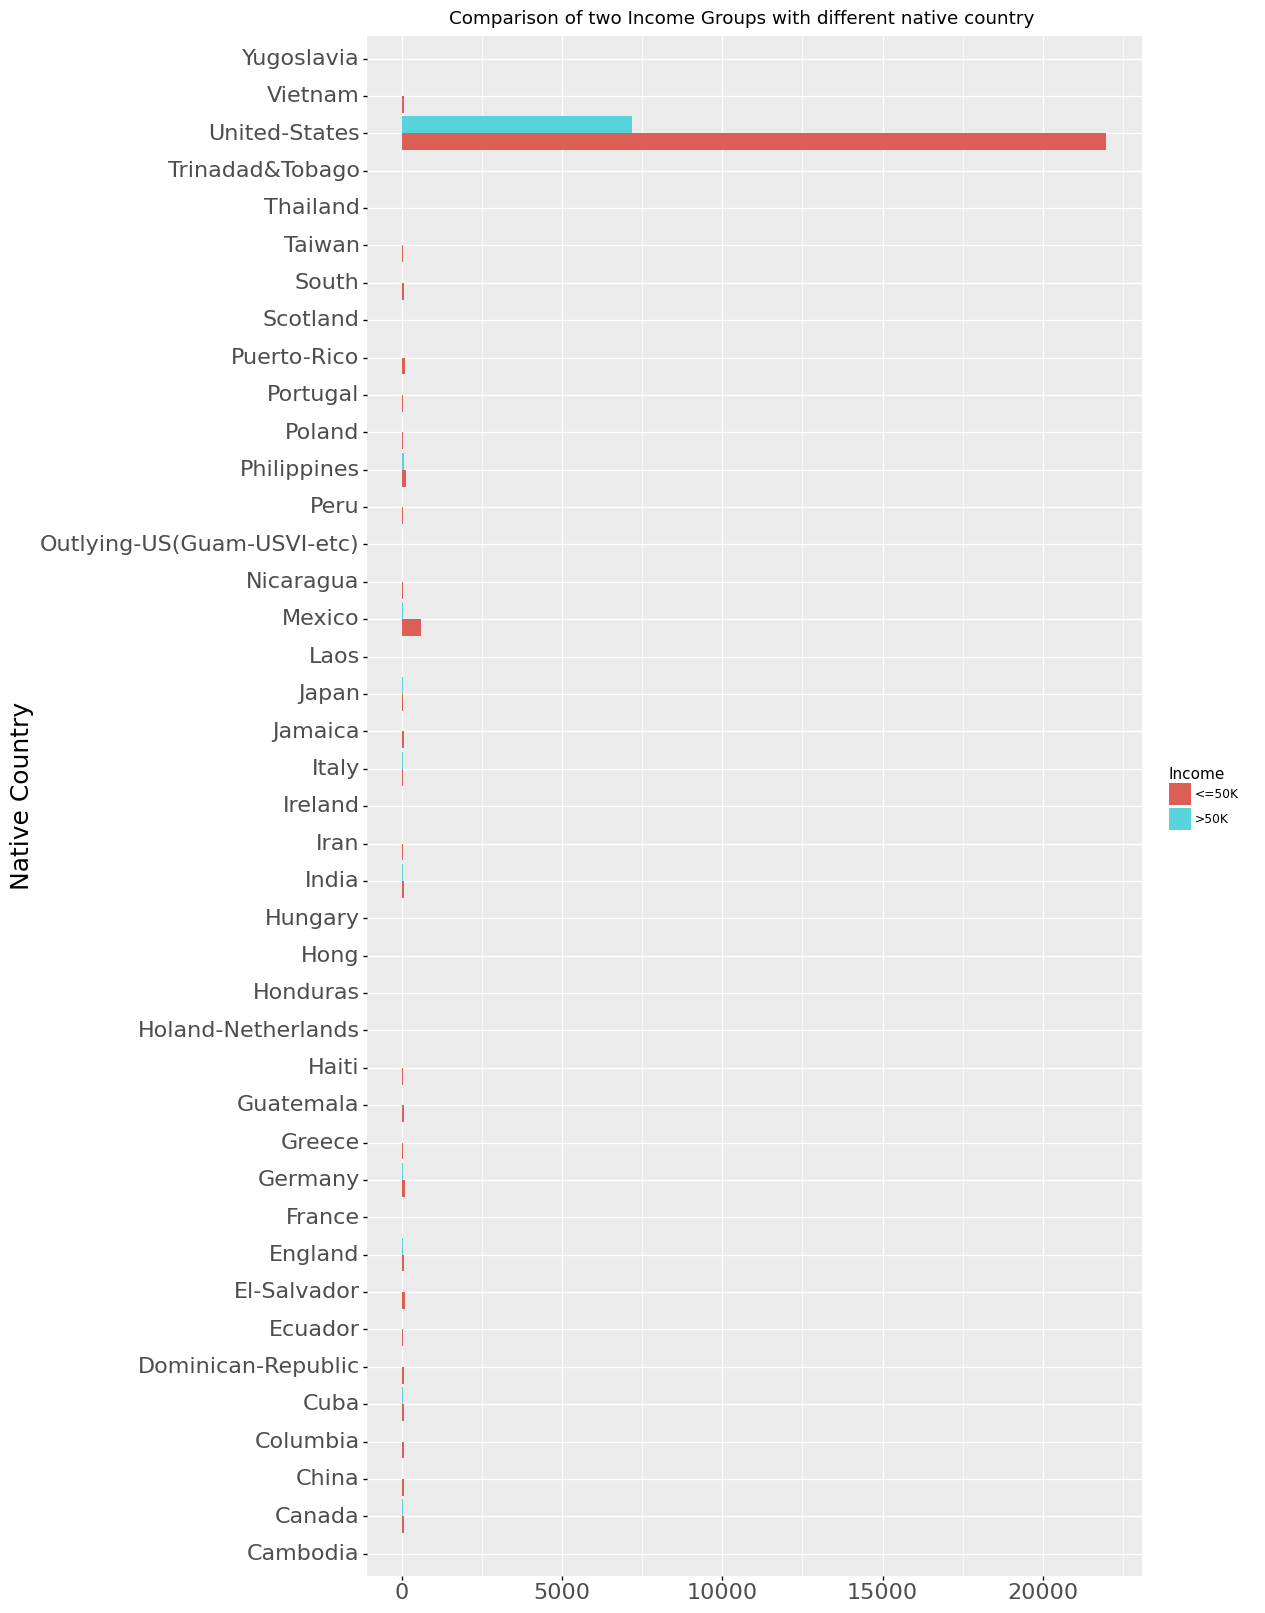

<ggplot: (122016416432)>

In [ ]:
work_data = df.groupby(['label','native_country']).age.count()
work_data = work_data.reset_index(name='counts')
work_data
(
  ggplot(work_data)+ 
  aes(x='native_country',y='counts',fill='label') +
  geom_bar(stat = "identity", position = "dodge") + 
  coord_flip() +
  labs(title='Comparison of two Income Groups with different native country', x = 'Native Country',legend='Income') +
  theme(figure_size=(10, 20),axis_title_x = element_blank(),
        axis_text_x = element_text(size = 16),axis_text_y = element_text(size = 16),
        axis_title = element_text(size = 18))
+ guides(fill = guide_legend(title = 'Income'))
)

The native country column is highly imbalance and most of records are from United States

### Sex

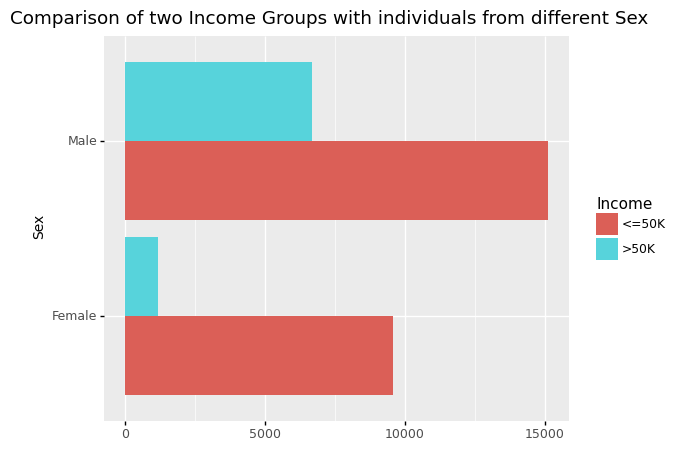

<ggplot: (122009974001)>

In [ ]:
work_data = df.groupby(['label','sex']).age.count()
work_data = work_data.reset_index(name='counts')
work_data
(
  ggplot(work_data)+ 
  aes(x='sex',y='counts',fill='label') +
  geom_bar(stat = "identity", position = "dodge") + 
  coord_flip() +
  labs(title='Comparison of two Income Groups with individuals from different Sex', x = 'Sex',legend='Income') +
  theme(figure_size=(6, 5),axis_title_x = element_blank(),
        axis_text_x = element_text(size = 9),axis_text_y = element_text(size = 9),
        axis_title = element_text(size = 10))
+ guides(fill = guide_legend(title = 'Income'))
)

Proportion of females earning more than 50K are lesser than that of males

# Data Preparation

In [ ]:
train = pd.read_csv('/content/adult.data')

train.columns = ['age', 'workclass', 'final_wt', 'education', 'yrs_of_education', 
              'marital_status', 'occupation', 'relationship_status', 'race', 'sex', 
              'capital_gain', 'capital_loss', 'working_hrs_per_week', 'native_country', 'label']
                
train.shape

(32560, 15)

In [ ]:
test = pd.read_csv('/content/adult.test')

In [ ]:
test.head(3)

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [ ]:
test = pd.read_csv('/content/adult.test', skiprows = 1)

test.columns = ['age', 'workclass', 'final_wt', 'education', 'yrs_of_education', 
              'marital_status', 'occupation', 'relationship_status', 'race', 'sex', 
              'capital_gain', 'capital_loss', 'working_hrs_per_week', 'native_country', 'label']
                
test.shape

(16280, 15)

In [ ]:
train = train.applymap(lambda x: x.strip() if isinstance(x, str) else x)
train.replace(to_replace = '?', value = np.nan, inplace=True)

In [ ]:
test = test.applymap(lambda x: x.strip() if isinstance(x, str) else x)
test.replace(to_replace = '?', value = np.nan, inplace=True)
test = test.dropna()

In [ ]:
test.label.unique()

array(['<=50K.', '>50K.'], dtype=object)

In [ ]:
test.label = test.label.str[:-1]
# remove full stop

In [ ]:
X_train = train.drop(columns = ['label'])
y_train = train['label']

X_test = test.drop(columns = ['label'])
y_test = test['label']

In [ ]:
cat_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship_status', 'race', 'sex', 'native_country']
num_columns = ['age', 'final_wt', 'yrs_of_education', 'capital_gain', 'capital_loss', 'working_hrs_per_week']

In [ ]:
# One hot encoder: unique data in rows to columns 
# To remove multi-collinearity we remove any one column
X_train_dummies = pd.get_dummies(X_train[cat_columns], drop_first = True)
X_train_dummies.shape

(32560, 91)

In [ ]:
X_train_dummies_col = X_train_dummies.columns.tolist()
# extract tcolumns from train data

In [ ]:
X_test_dummies = pd.get_dummies(X_test[cat_columns], drop_first = True)
X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies_col).fillna(0) # Fill 0 values in remaining columns added
# reindex: check functionality
X_test_dummies.shape

(15059, 91)

In [ ]:
# Range, units and scale of age and salary is different
# To bring every column in same scale
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train_dummies)
# PCA: DDR


# train and test seperately: data leakage

MinMaxScaler()

In [ ]:
X_train_cat_scaled = pd.DataFrame(min_max_scaler.transform(X_train_dummies))
X_test_cat_scaled = pd.DataFrame(min_max_scaler.transform(X_test_dummies))

In [ ]:
# 95% variance is captured
# check PCA
pca = PCA(0.95)
pca.fit(X_train_cat_scaled)

PCA(n_components=0.95)

In [ ]:
X_train_pca = pd.DataFrame(pca.transform(X_train_cat_scaled))
X_test_pca = pd.DataFrame(pca.transform(X_test_cat_scaled))

X_train_pca.shape, X_test_pca.shape

((32560, 35), (15059, 35))

In [ ]:
# Scaler for numerical data
stand_scaler = StandardScaler()
stand_scaler.fit(X_train[num_columns])

StandardScaler()

In [ ]:
X_train_num_scaled = pd.DataFrame(stand_scaler.transform(X_train[num_columns]))
X_test_num_scaled = pd.DataFrame(stand_scaler.transform(X_test[num_columns]))

In [ ]:
X_train = pd.concat([X_train_pca, X_train_num_scaled], axis = 1)
#  joining numerical and categorical columnwise
X_train.columns = range(X_train.shape[1])
# rename column name to 1 to n

X_test = pd.concat([X_test_pca, X_test_num_scaled], axis = 1)
X_test.columns = range(X_test.shape[1])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32560, 41), (15059, 41), (32560,), (15059,))

In [ ]:
# SMOTE: algorithm used to overcome imbalance in data
# oversample: to increase the instances of minority class
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

<=50K    24719
>50K     24719
Name: label, dtype: int64

# Model Training

In [ ]:
forest_clf = RandomForestClassifier(random_state=0)
# check random forest classifier and random state
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
forest_clf.score(X_test, y_test)
# score: accuracy

0.8279434225380171

In [ ]:
svc_clf = SVC(random_state=0)
svc_clf.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
svc_clf.score(X_test, y_test)

0.8093498904309715

The testing accuracy of **Random Forest** and **SVC** is **82%** and **80%** respectively 

# K-Folds



In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print(f'Mean Accuracy: {(forest_scores.mean())}')

Mean Accuracy: 0.8923903863264517


In [ ]:
svc_scores = cross_val_score(svc_clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print(f'Mean Accuracy: {(svc_scores.mean())}')

Mean Accuracy: 0.8515512317768843


The mean accuracy for **K-fold random forest** and SVC is **89%** and **85%** respectively

# Model Metrics

performance evaluators

In [ ]:
y_pred = forest_clf.predict(X_test)

In [ ]:
print('Random Forest Classifier ->')
precision, recall, f_measure,  support = precision_recall_fscore_support(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F measure: {f_measure}')

Random Forest Classifier ->
Precision: [0.89410284 0.64091487]
Recall: [0.87560525 0.68162162]
F measure: [0.88475737 0.66064178]


In [ ]:
y_pred = svc_clf.predict(X_test)

In [ ]:
print('Support Vector Classifier ->')
precision, recall, f_measure,  support = precision_recall_fscore_support(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F measure: {f_measure}')

Support Vector Classifier ->
Precision: [0.94134775 0.57615286]
Recall: [0.79690114 0.84756757]
F measure: [0.86312277 0.68598928]


# 1. Random Forest Classifier

  *   The **Precision** for Label-1 and Label-2 is **0.89** and **0.64** respectively
  *   The **Recall** for Label-1 and Label-2 is **0.87** and **0.68** respectively
  *   The **F measure** for Label-1 and Label-2 is **0.88** and **0.66** respectively

# 2. Support Vector Classifier

  *   The **Precision** for Label-1 and Label-2 is **0.94** and **0.57** respectively
  *   The **Recall** for Label-1 and Label-2 is **0.79** and **0.84** respectively
  *   The **F measure** for Label-1 and Label-2 is **0.86** and **0.68** respectively



